<a href="https://colab.research.google.com/github/btg1631/study_data_analytics/blob/main/docs/quests/visuallizations/multivariate_OrdersDeliveryList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글 폰트 설치 및 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,528 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

### loading dataset file and check dataframe

In [97]:
import pandas as pd
import numpy as np

In [89]:
df_SMDWD = pd.read_csv('ShoppingMallDeliveryWithDate.csv')
df_SMDWD

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231
...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231


In [18]:
df_SMDWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46749 non-null  object 
 1   배송번호    46749 non-null  object 
 2   배송시작일   46749 non-null  object 
 3   배송완료일   46749 non-null  object 
 4   상품구매금액  46749 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46749 non-null  int64  
 7   주문경로    46749 non-null  object 
 8   주문일     46749 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [123]:
df_SMDWD.describe()

,상품구매금액,상품번호,수량,주문일
count,4.674900e+04,46661.000000,46749.000000,4.674900e+04
mean,6.936814e+04,763.193073,1.177822,2.018404e+07
std,6.611247e+04,456.323734,0.683334,5.192403e+03
min,0.000000e+00,38.000000,1.000000,2.017010e+07
25%,3.288000e+04,378.000000,1.000000,2.018073e+07
50%,6.778000e+04,928.000000,1.000000,2.018112e+07
75%,9.213000e+04,1209.000000,1.000000,2.019022e+07
max,4.963400e+06,1681.000000,50.000000,2.019062e+07


In [ ]:
sns.pairplot(data=df_SMDWD[['상품구매금액', '상품번호', '수량', '주문일']])
plt.show()

In [11]:
import seaborn as sns

### 시각화

#### x: 범주 / y: 연속

##### x: 결제수단 / y: 상품구매금액

In [124]:
df_SMDWD_pivots = pd.pivot_table(data=df_SMDWD[['결제수단', '상품구매금액']]
               , index=['결제수단'], values=['상품구매금액'], aggfunc= 'sum')
df_SMDWD_pivots = df_SMDWD_pivots.sort_values(by='상품구매금액', ascending=False)
df_SMDWD_pivots

,상품구매금액
결제수단,
무통장입금,1648386554
카드,964388905
"적립금,무통장입금",253978716
"적립금,카드",96588600
"쿠폰,무통장입금",83835150
"쿠폰,카드",79419780
실시간계좌이체,26855650
휴대폰,22707770
"예치금,무통장입금",12396800


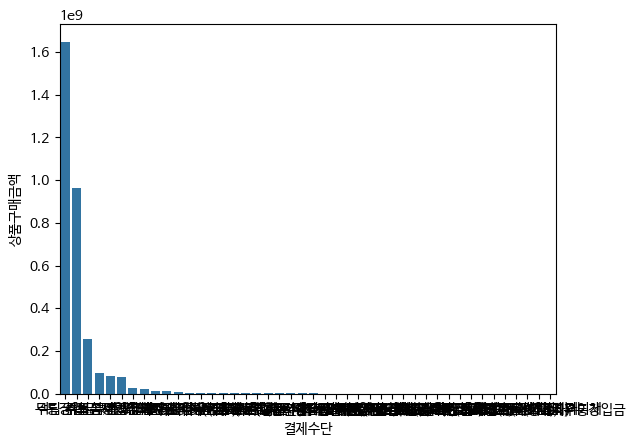

In [125]:
sns.barplot(data=df_SMDWD_pivots, x='결제수단', y='상품구매금액')
plt.show()

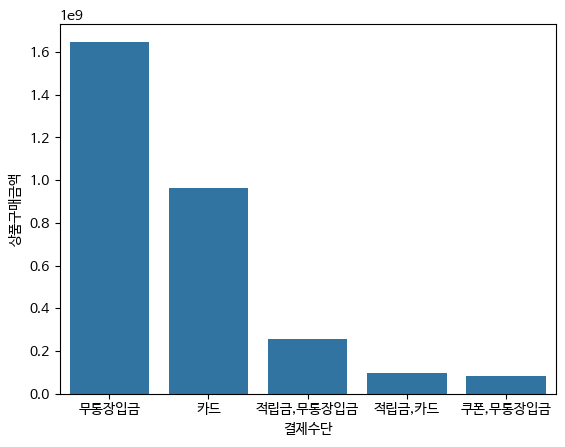

In [126]:
sns.barplot(data=df_SMDWD_pivots[:5], x='결제수단', y='상품구매금액')
plt.show()

##### x: 주문경로  / y: 수량

In [128]:
df_SMDWD_pivots = pd.pivot_table(data=df_SMDWD[['주문경로', '수량']]
               , index=['주문경로'], values=['수량'], aggfunc= 'count')
df_SMDWD_pivots = df_SMDWD_pivots.sort_values(by='수량', ascending=False)
df_SMDWD_pivots

,수량
주문경로,
PC쇼핑몰,25695
모바일웹,18531
네이버 페이,2523


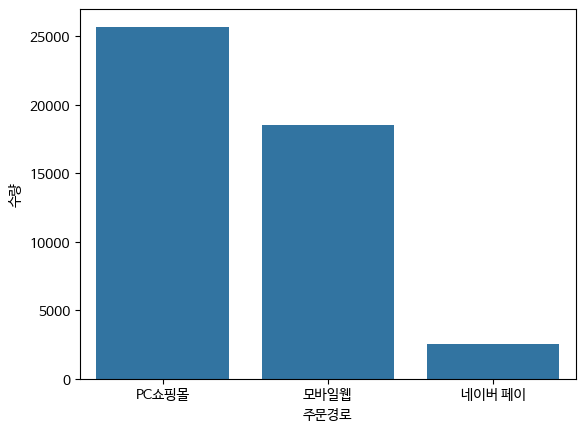

In [129]:
sns.barplot(data=df_SMDWD_pivots, x='주문경로', y='수량')
plt.show()

#### X: 연속 / Y: 연속

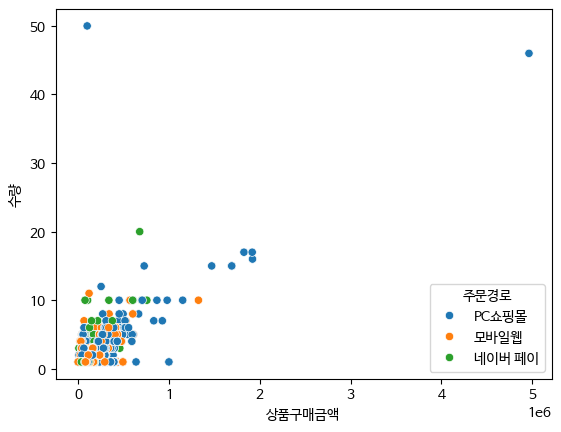

In [78]:
sns.scatterplot(data=df_SMDWD, x='상품구매금액', y='수량', hue='주문경로')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


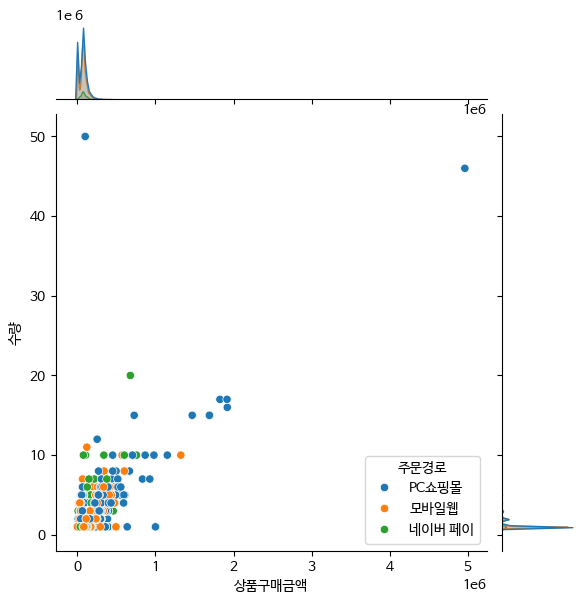

In [93]:
sns.jointplot(data=df_SMDWD, x='상품구매금액', y='수량', hue='주문경로')
plt.show()

<Axes: xlabel='배송시작일_datetime', ylabel='배송완료일_datetime'>

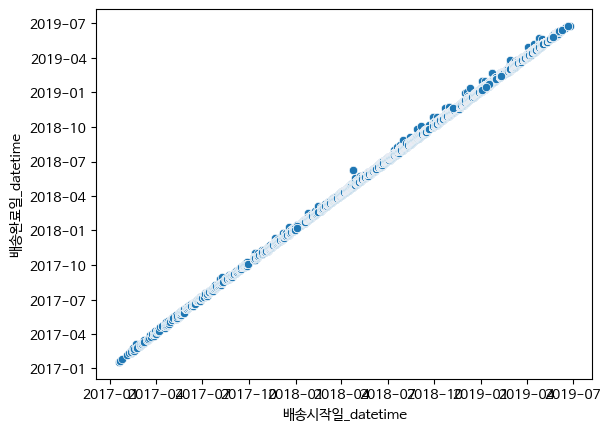

In [71]:
sns.scatterplot(data=df_SMDWD, x='배송시작일_datetime', y='배송완료일_datetime')

<Axes: xlabel='상품번호', ylabel='수량'>

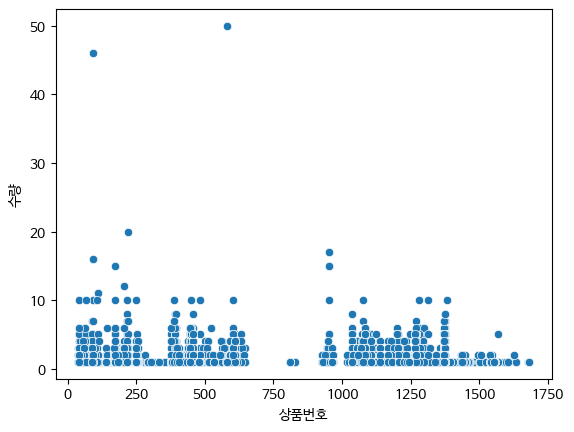

In [88]:
sns.scatterplot(data=df_SMDWD, x='상품번호', y='수량')

#### X: 시간(순서) / y: 연속

##### 주문일_date / 배송완료일_datetime / 배송시작일_datetime

In [25]:
df_SMDWD['주문일_date'] = pd.to_datetime(df_SMDWD['주문일'], format="%Y%m%d")
df_SMDWD['주문일_date']

0       2018-12-27
1       2018-12-29
2       2018-12-30
3       2018-12-31
4       2018-12-31
           ...    
46744   2017-12-29
46745   2017-12-29
46746   2017-12-30
46747   2017-12-31
46748   2017-12-31
Name: 주문일_date, Length: 46749, dtype: datetime64[ns]

In [105]:
def convert_time(x):
  date, ampm, time = x.split()
  if ampm == "오후" and time != "12:00":
    hour, minute = map(int, time.split(":"))
    time = f"{hour+12 if hour != 12 else hour}:{minute}"
  return pd.to_datetime(f"{date} {time}", format="%Y-%m-%d %H:%M")

In [106]:
df_SMDWD['배송완료일_datetime'] = df_SMDWD['배송완료일'].apply(convert_time)
df_SMDWD['배송완료일_datetime']

0       2019-01-11 05:32:00
1       2019-01-07 05:32:00
2       2019-01-07 05:32:00
3       2019-01-07 05:32:00
4       2019-01-11 05:32:00
                ...        
46744   2018-01-02 05:31:00
46745   2018-01-07 05:38:00
46746   2018-01-11 02:46:00
46747   2018-01-06 18:06:00
46748   2018-01-07 05:38:00
Name: 배송완료일_datetime, Length: 46749, dtype: datetime64[ns]

In [107]:
df_SMDWD['배송시작일_datetime'] = df_SMDWD['배송시작일'].apply(convert_time)
df_SMDWD['배송시작일_datetime']

0       2019-01-07 08:56:00
1       2019-01-03 09:30:00
2       2019-01-03 09:30:00
3       2019-01-03 09:30:00
4       2019-01-07 08:56:00
                ...        
46744   2017-12-29 16:32:00
46745   2018-01-03 09:45:00
46746   2018-01-02 19:06:00
46747   2018-01-03 14:00:00
46748   2018-01-03 12:43:00
Name: 배송시작일_datetime, Length: 46749, dtype: datetime64[ns]

In [53]:
df_SMDWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   결제수단            46749 non-null  object        
 1   배송번호            46749 non-null  object        
 2   배송시작일           46749 non-null  object        
 3   배송완료일           46749 non-null  object        
 4   상품구매금액          46749 non-null  int64         
 5   상품번호            46661 non-null  float64       
 6   수량              46749 non-null  int64         
 7   주문경로            46749 non-null  object        
 8   주문일             46749 non-null  int64         
 9   주문일_date        46749 non-null  datetime64[ns]
 10  배송시작일_datetime  46749 non-null  datetime64[ns]
 11  배송완료일_datetime  46749 non-null  datetime64[ns]
 12  주문일_date_month  46749 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(5)
memory usage: 4.6+ MB


##### code

<Axes: xlabel='주문일_date', ylabel='수량'>

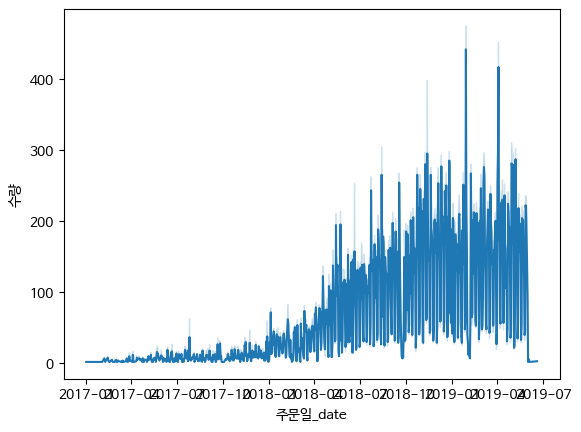

In [54]:
sns.lineplot(data=df_SMDWD, x='주문일_date', y='수량', estimator=sum)

<Axes: xlabel='주문일_date', ylabel='배송시작일_datetime'>

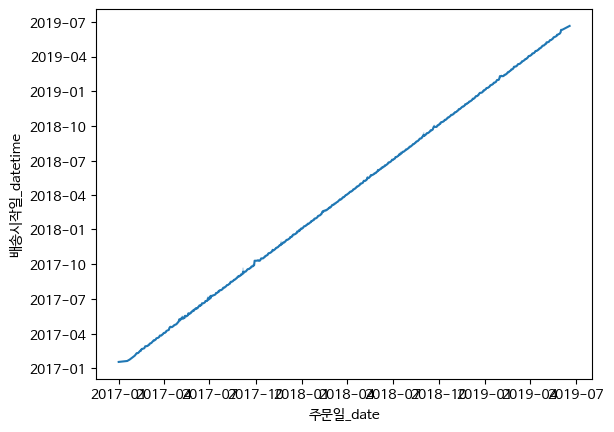

In [72]:
sns.lineplot(data=df_SMDWD, x='주문일_date', y='배송시작일_datetime')

<Axes: xlabel='배송시작일_datetime', ylabel='배송완료일_datetime'>

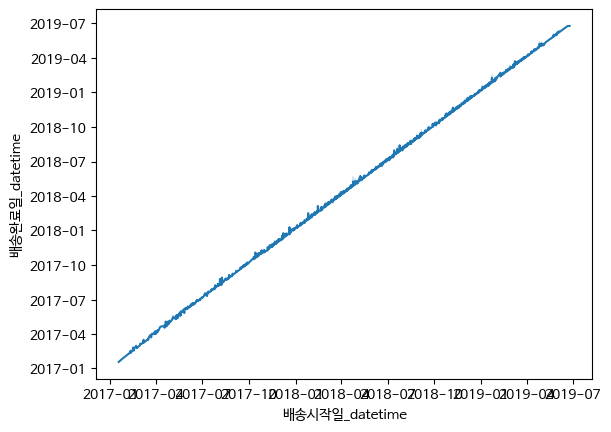

In [70]:
sns.lineplot(data=df_SMDWD, x='배송시작일_datetime', y='배송완료일_datetime')

<Axes: xlabel='상품번호', ylabel='상품구매금액'>

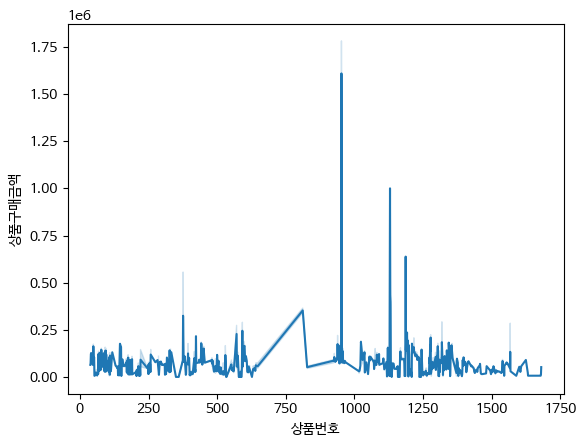

In [103]:
sns.lineplot(data=df_SMDWD, x='상품번호', y='상품구매금액')

<Axes: xlabel='상품번호', ylabel='수량'>

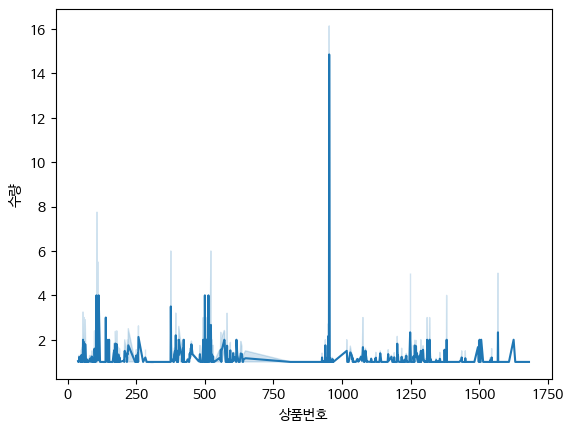

In [104]:
sns.lineplot(data=df_SMDWD, x='상품번호', y='수량')